In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [594]:
data = pd.read_csv("NY-House-Dataset.csv")
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [596]:
data.shape

(4801, 17)

In [598]:
df = data.drop(['STATE', 'ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'STREET_NAME', 'BROKERTITLE', 'LOCALITY', 'ADMINISTRATIVE_AREA_LEVEL_2', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'], axis='columns')
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York County
2,House for sale,260000,4,2.000000,2015.0,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York County


In [600]:
df.isnull().sum()

TYPE            0
PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
SUBLOCALITY     0
dtype: int64

In [602]:
df['price_per_sqft'] = df['PRICE']/df['PROPERTYSQFT']
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,price_per_sqft
0,Condo for sale,315000,2,2.000000,1400.0,Manhattan,225.000000
1,Condo for sale,195000000,7,10.000000,17545.0,New York County,11114.277572
2,House for sale,260000,4,2.000000,2015.0,Richmond County,129.032258
3,Condo for sale,69000,3,1.000000,445.0,New York County,155.056180
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York County,3880.070547


In [604]:
sublocality_stats = df.groupby('SUBLOCALITY')['SUBLOCALITY'].agg('count').sort_values(ascending=False)
sublocality_stats

SUBLOCALITY
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        1
Fort Hamilton          1
East Bronx             1
Dumbo                  1
Rego Park              1
Brooklyn Heights       1
Snyder Avenue          1
Name: SUBLOCALITY, dtype: int64

In [620]:
df['SUBLOCALITY'] = df['SUBLOCALITY'].replace(['New York County', 'New York'], 'Manhattan')
df['SUBLOCALITY'] = df['SUBLOCALITY'].replace(['Kings County', 'Coney Island', 'Fort Hamilton', 'Dumbo', 'Brooklyn Heights', 'Snyder Aven'], 'Brooklyn')
df['SUBLOCALITY'] = df['SUBLOCALITY'].replace(['Bronx County', 'Riverdale', 'East Bronx'], 'The Bronx')
df['SUBLOCALITY'] = df['SUBLOCALITY'].replace(['Richmond County'], 'Staten Island')
df['SUBLOCALITY'] = df['SUBLOCALITY'].replace(['Queens County', 'Flushing', 'Jackson Heights', 'Rego Park'], 'Queens')
df.rename(columns={'SUBLOCALITY': 'BOROUGH'}, inplace=True)
borough_stats = df.groupby('BOROUGH')['BOROUGH'].agg('count').sort_values(ascending=False)
borough_stats

BOROUGH
Manhattan        1323
Queens           1245
Brooklyn         1198
Staten Island     539
The Bronx         496
Name: BOROUGH, dtype: int64

In [622]:
df.price_per_sqft.describe()

count      4801.000000
mean        823.037256
std        3302.818910
min           1.141833
25%         324.027778
50%         489.639175
75%         822.941176
max      214748.364700
Name: price_per_sqft, dtype: float64

In [914]:
from scipy import stats

def remove_pps_outliers(df):
    for col in ['price_per_sqft', 'PROPERTYSQFT']:
        df = df.copy()
        z_scores = np.abs(stats.zscore(df[col]))
        df = df[(z_scores < 3)]  # Using Z-score threshold of 3 for outlier removal
    return df
df2 = remove_pps_outliers(df) 
def remove_grouped_outliers(df):
    df_out = pd.DataFrame()
    for borough, borough_df in df.groupby('BOROUGH'):
        for bed, bed_df in borough_df.groupby('BEDS'):
            m = np.mean(bed_df.price_per_sqft)
            sd = np.std(bed_df.price_per_sqft)
            reduced_df = bed_df[(bed_df.price_per_sqft >= (m - 2 * sd)) & (bed_df.price_per_sqft <= (m + 2 * sd))]
            df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df3 = remove_grouped_outliers(df2)
df3.shape

(4549, 7)

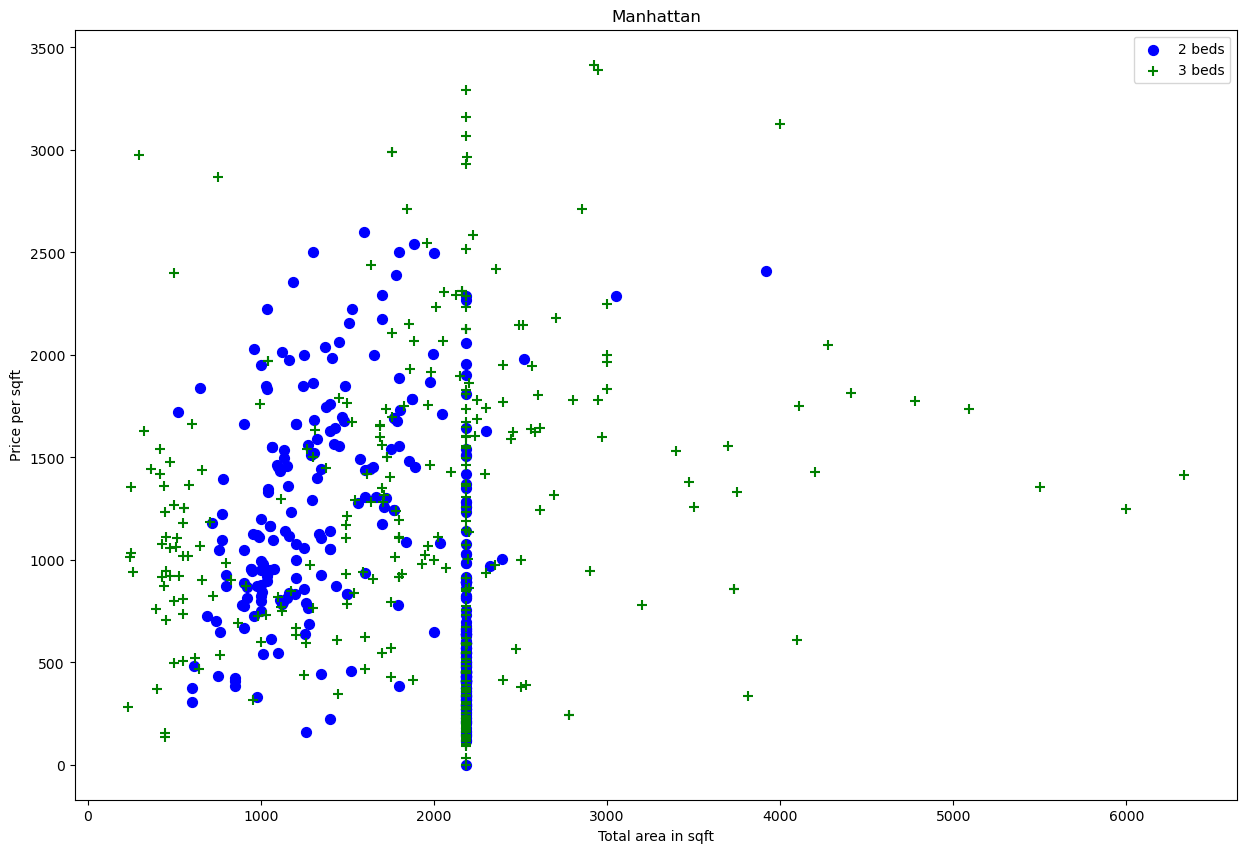

In [916]:
def plot_scatter(df, borough):
    bed2 = df[(df.BOROUGH==borough) & (df.BEDS==2)]
    bed3 = df[(df.BOROUGH==borough) & (df.BEDS==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bed2.PROPERTYSQFT,bed2.price_per_sqft,color='blue', label='2 beds', s=50)
    plt.scatter(bed3.PROPERTYSQFT,bed3.price_per_sqft,marker='+',color='green', label='3 beds', s=50)
    plt.xlabel("Total area in sqft")
    plt.ylabel("Price per sqft")
    plt.title(borough)
    plt.legend()

plot_scatter(df3, "Manhattan")

Text(0, 0.5, 'Count')

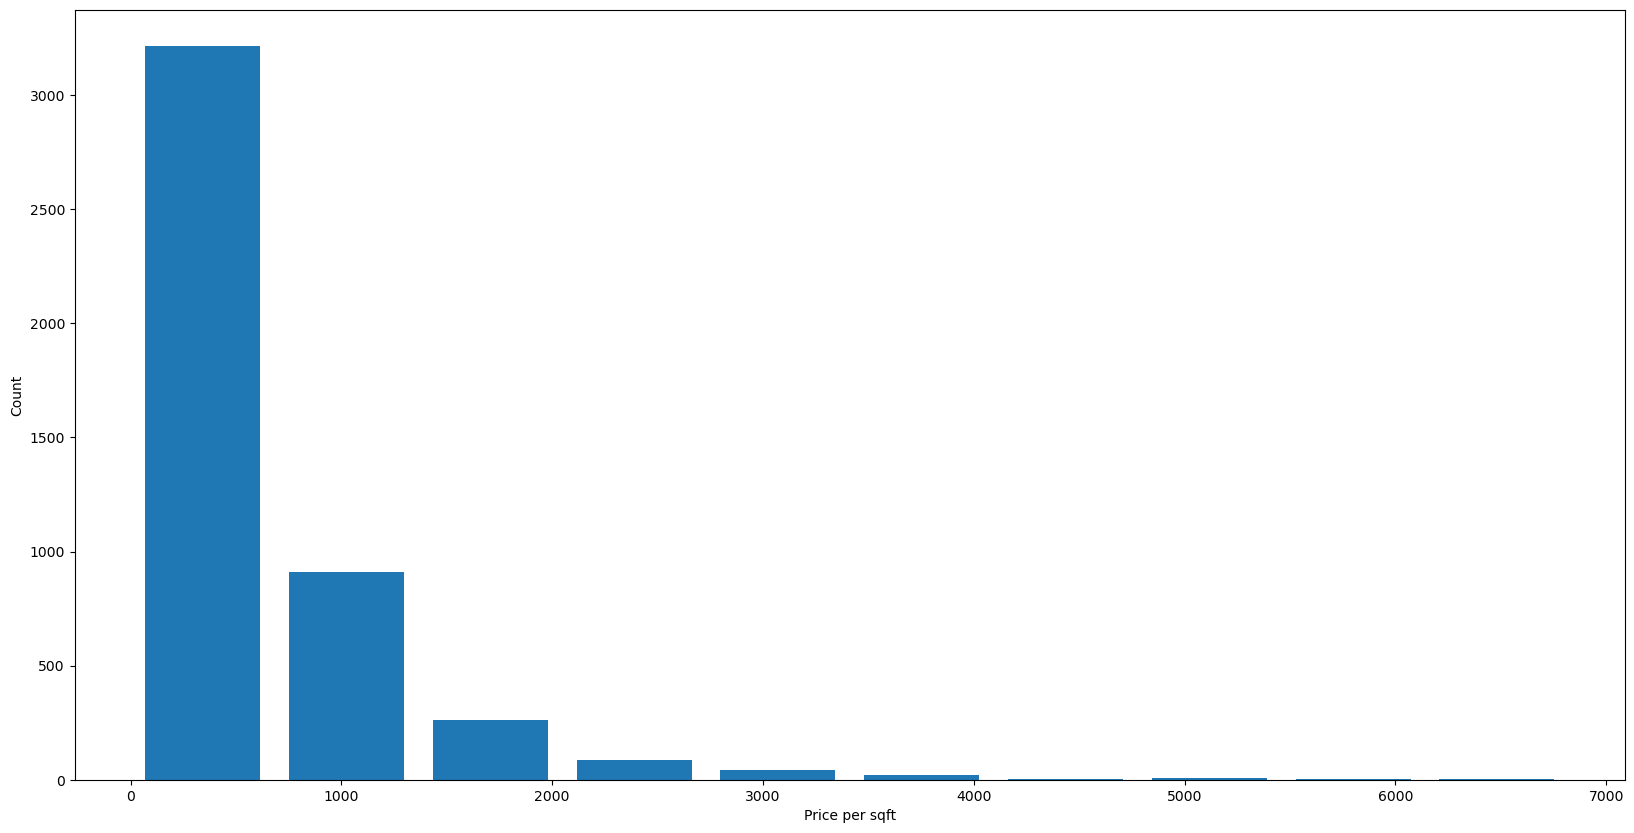

In [918]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df3.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [920]:
def remove_outliers(df):
    exclude_indicies = np.array([])
    for borough, borough_df in df.groupby('BOROUGH'):
        bed_stats = {}
        for bed, bed_df in borough_df.groupby('BEDS'):
            bed_stats[bed] = {
                'm': np.mean(bed_df.price_per_sqft),
                'st': np.std(bed_df.price_per_sqft),
                'count': bed_df.shape[0]
            }
        for bed, bed_df in borough_df.groupby('BEDS'):
            stats = bed_stats.get(bed - 1)
            if stats and stats['count']>5:
                exclude_indicies = np.append(exclude_indicies, bed_df[bed_df.price_per_sqft<(stats['m'])].index.values)
    return df.drop(exclude_indicies,axis='index')

df4 = remove_outliers(df3)

df4.shape

(2804, 7)

Text(0, 0.5, 'Count')

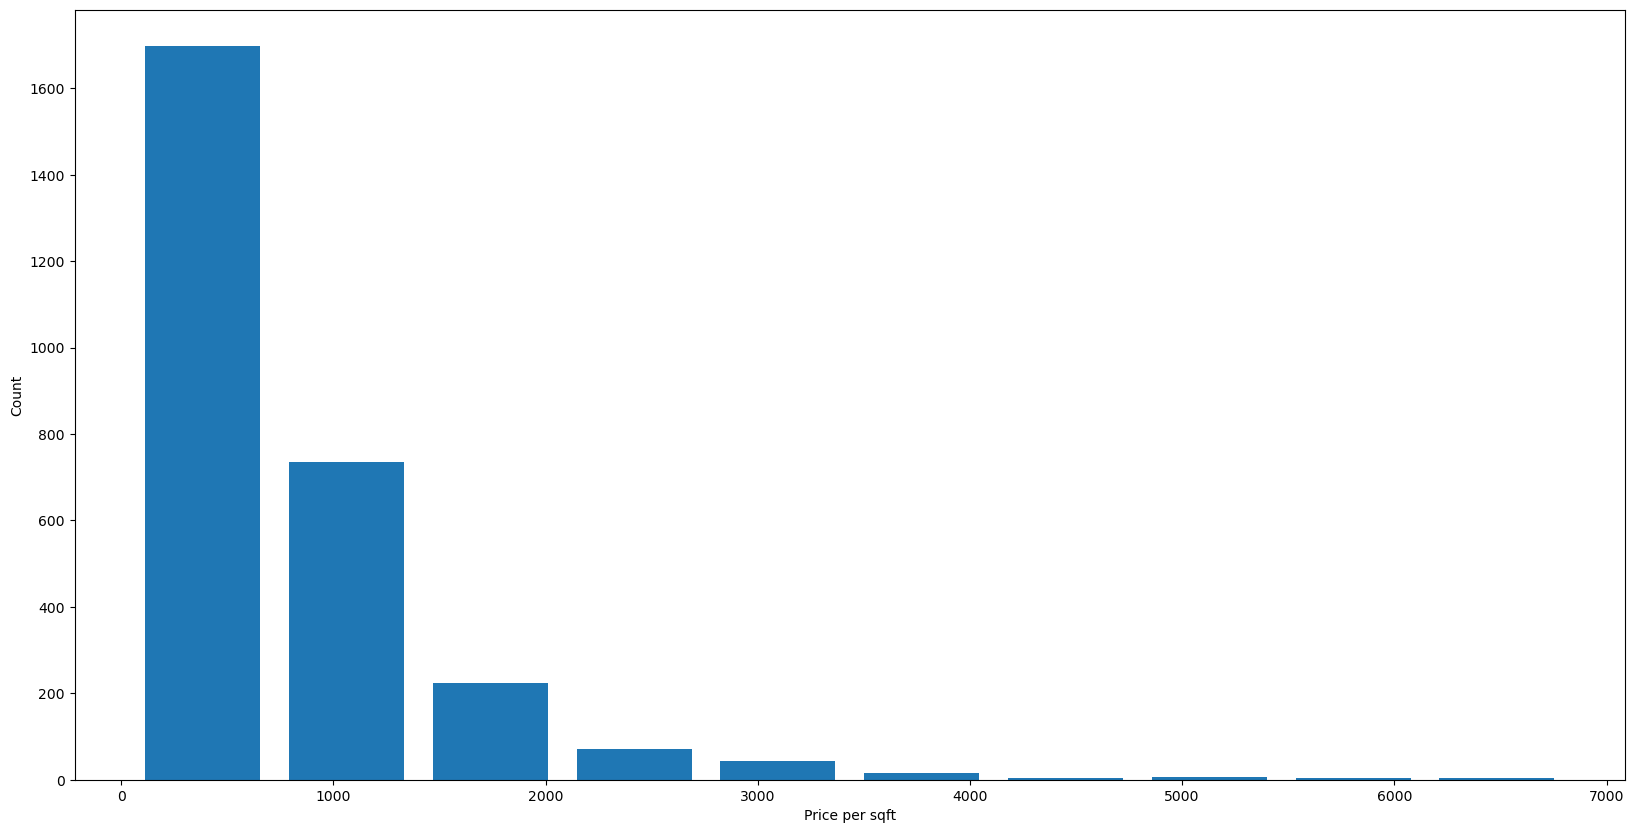

In [922]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df4.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

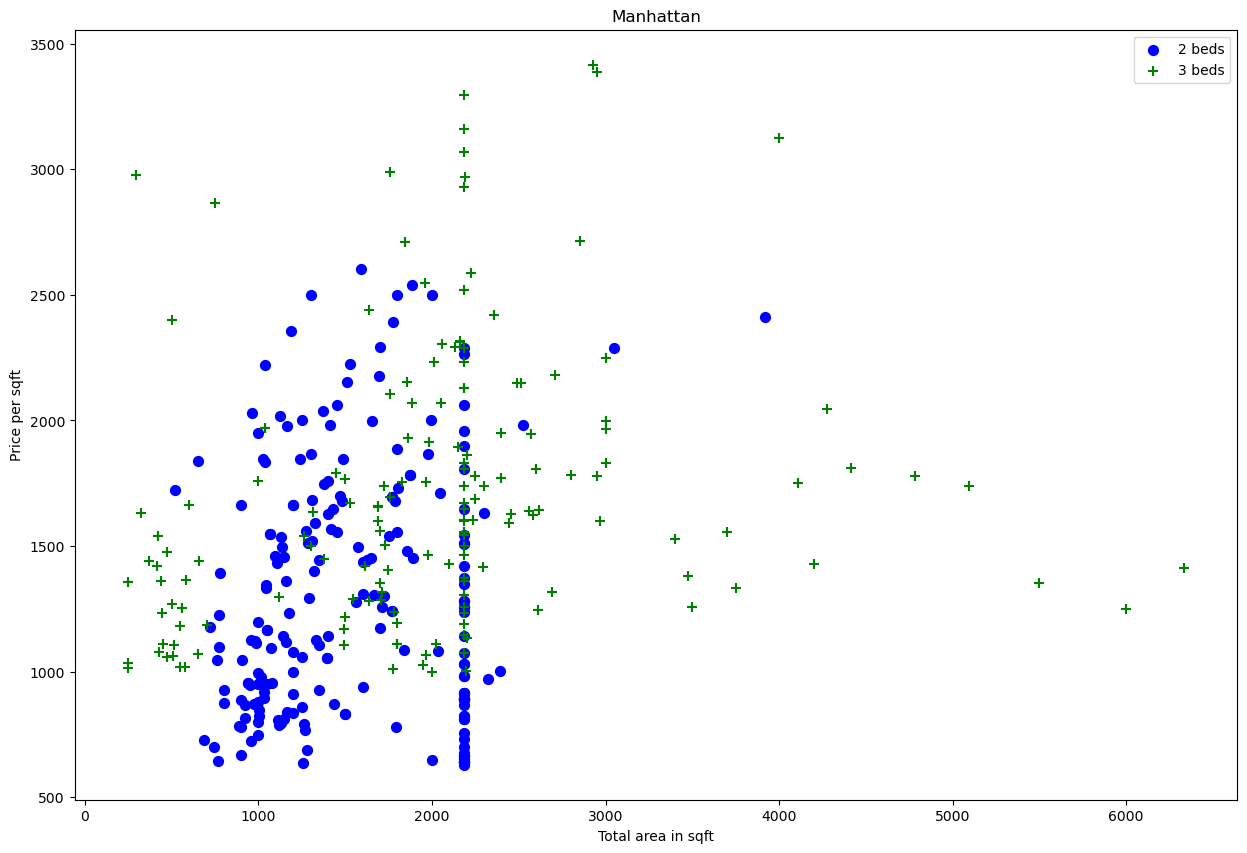

In [924]:
plot_scatter(df4, "Manhattan")

In [926]:
df4[df4.BATH>df4.BEDS+2]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH,price_per_sqft
425,Multi-family home for sale,2295000,3,7.0,2184.207862,Brooklyn,1050.724173
703,Multi-family home for sale,3400000,3,8.0,2184.207862,Brooklyn,1556.628405
1798,Townhouse for sale,8950000,3,6.0,6336.000000,Manhattan,1412.563131
2354,Townhouse for sale,29950000,10,13.0,8750.000000,Manhattan,3422.857143


In [928]:
df5 = df4[df4.BATH<=df4.BEDS+2]
df5.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH,price_per_sqft
0,Co-op for sale,279000,1,1.0,750.0,Brooklyn,372.000000
1,Condo for sale,528000,1,1.0,602.0,Brooklyn,877.076412
2,Co-op for sale,559500,1,1.0,800.0,Brooklyn,699.375000
3,Co-op for sale,280000,1,1.0,1000.0,Brooklyn,280.000000
4,Co-op for sale,288000,1,1.0,845.0,Brooklyn,340.828402


In [930]:
df6 = df5.drop(['TYPE', 'price_per_sqft'], axis='columns')
dummies = pd.get_dummies(df6.BOROUGH).astype(int)
dummies.head(3)


,Brooklyn,Manhattan,Queens,Staten Island,The Bronx
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0


In [932]:
df7 = pd.concat([df6, dummies.drop('The Bronx', axis='columns')],axis='columns')
df7.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH,Brooklyn,Manhattan,Queens,Staten Island
0,279000,1,1.0,750.0,Brooklyn,1,0,0,0
1,528000,1,1.0,602.0,Brooklyn,1,0,0,0
2,559500,1,1.0,800.0,Brooklyn,1,0,0,0
3,280000,1,1.0,1000.0,Brooklyn,1,0,0,0
4,288000,1,1.0,845.0,Brooklyn,1,0,0,0


In [934]:
df8 = df7.drop('BOROUGH',axis='columns')
df8['PRICE'] = np.log1p(df8['PRICE'])
df8.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,Brooklyn,Manhattan,Queens,Staten Island
0,12.538971,1,1.0,750.0,1,0,0,0
1,13.176853,1,1.0,602.0,1,0,0,0
2,13.234801,1,1.0,800.0,1,0,0,0
3,12.542548,1,1.0,1000.0,1,0,0,0
4,12.570719,1,1.0,845.0,1,0,0,0


In [936]:
df8.shape

(2800, 8)

In [1058]:
x = df8.drop('PRICE',axis='columns')
y = df8.PRICE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_poly)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8780765540545473

In [1060]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x_scaled, y, cv=cv)

array([0.83435406, 0.89350478, 0.88807972, 0.77997787, 0.86126972])

In [1088]:
def predict_cost(borough, sqft, num_beds, num_baths):
    input_data = pd.DataFrame({
        'BEDS': [num_beds],
        'BATH': [num_baths],
        'PROPERTYSQFT': [sqft],
        'Brooklyn': [0],
        'Manhattan': [0],
        'Queens': [0],
        'Staten Island': [0]
    })
    
    if borough == 'Brooklyn':
        input_data['Brooklyn'] = 1
    elif borough == 'Manhattan':
        input_data['Manhattan'] = 1
    elif borough == 'Queens':
        input_data['Queens'] = 1
    elif borough == 'Staten Island':
        input_data['Staten Island'] = 1
    
    expected_columns = ['BEDS', 'BATH', 'PROPERTYSQFT', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
    input_data = input_data.reindex(columns=expected_columns, fill_value=0)
    
    input_poly = poly.transform(input_data)
    
    input_scaled = scaler.transform(input_poly)
    
    prediction = lr_clf.predict(input_scaled)
    
    return np.exp(prediction[0])

predict_cost('Brooklyn', 750, 1, 1)

390566.5309119566

In [1092]:
import pickle

model_data = {
    'model': lr_clf,
    'poly': poly,
    'scaler': scaler
}

with open('housing_price_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)
